# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [79]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialized the Panel Extensions (for Plotly)
pn.extension('plotly')

In [80]:
#Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_KEY")

# Import Data

In [81]:
# Imported the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [82]:
# Defined Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    #make our data
    housing_units_per_year = sfo_data["housing_units"].groupby("year").mean()
    
    #built our plot
    x = "Year"
    y = "Housing Units Per Year"
    title = "Housing Units per Year from 2010-2016 "
    #plot
    fig_housing_units = plt.figure()
    #added to plot
    plot_housing_units_per_year = housing_units_per_year.plot.bar()
    plot_housing_units_per_year.set_xlabel(x)
    plot_housing_units_per_year.set_ylabel(y)
    plot_housing_units_per_year.set_title(title)

    #plt.show()
    plt.close(fig_housing_units)
    
    #return our plot
    return fig_housing_units

In [83]:
#housing_units_per_year()

In [84]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_price_per_sqrft = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby('year').mean()
    
    
    x = "Year"
    y = "avg sale price"
    title = "average gross rent in San Francisco "

    fig_housing_units = plt.figure()

    avg_gross_rent= avg_price_per_sqrft['gross_rent'].plot.line()
    avg_gross_rent.set_xlabel(x)
    avg_gross_rent.set_ylabel(y)
    avg_gross_rent.set_title(title)

    # plt.show()
    plt.close(fig_housing_units)
    #return our plot
    return pn.pane.Matplotlib(fig_housing_units, tight=True)

In [85]:
#average_gross_rent()

In [86]:
def average_sales_price():
    """Average Sales Price Per Year."""
    avg_price_per_sqrft = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby('year').mean()
    x = "Year"
    y = "avg sale price"
    title = "average sale price per square foot"

    fig_housing_units = plt.figure()
    avg_gross_rent= avg_price_per_sqrft['sale_price_sqr_foot'].plot.line()
    avg_gross_rent.set_xlabel(x)
    avg_gross_rent.set_ylabel(y)
    avg_gross_rent.set_title(title)

    #plt.show()
    plt.close(fig_housing_units)
    
    return pn.pane.Matplotlib(fig_housing_units, tight=True)
    
    # YOUR CODE HERE!

In [87]:
#average_sales_price()

In [88]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    average_price_per_neighborhood = sfo_data[['sale_price_sqr_foot','neighborhood']].groupby(['year','neighborhood']).mean()
    avg_price_plot = average_price_per_neighborhood.hvplot.line(
        x='year',
        y='sale_price_sqr_foot',
        xlabel='Year',
        ylabel= 'avg sales price per square foot',
        groupby= 'neighborhood')

    return avg_price_plot

In [89]:
#average_price_by_neighborhood()

In [90]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    Average_sales_price_per_neighborhood = sfo_data.groupby('neighborhood').mean()
    avg_price_per_neighborhood = Average_sales_price_per_neighborhood.sort_values(by="sale_price_sqr_foot",ascending=False)
    Average_sales_price_per_neighborhood = avg_price_per_neighborhood.head(10)
    plot = Average_sales_price_per_neighborhood.hvplot.bar(
        x='neighborhood',
        y='sale_price_sqr_foot',
        xlabel='neighborhood',
        ylabel= 'top ten most expensive neighborhood', 
        rot=45,
        color="sale_price_sqr_foot",)

    return plot    
    # YOUR CODE HERE!

In [91]:
#top_most_expensive_neighborhoods()

In [92]:
def parallel_categories():
    """Parallel Categories Plot."""
    Average_sales_price_per_neighborhood = sfo_data.groupby('neighborhood').mean()
    avg_price_per_neighborhood = Average_sales_price_per_neighborhood.sort_values(by="sale_price_sqr_foot",ascending=False)
    Average_sales_price_per_neighborhood = avg_price_per_neighborhood.head(10)
    
    plot = px.parallel_categories(
    Average_sales_price_per_neighborhood,
    color="sale_price_sqr_foot")
    

    return plot

In [93]:
#parallel_categories()


In [147]:
def parallel_coordinates():
    """Parallel coordinates Plot."""
    Average_sales_price_per_neighborhood = sfo_data.groupby('neighborhood').mean()
    avg_price_per_neighborhood = Average_sales_price_per_neighborhood.sort_values(by="sale_price_sqr_foot",ascending=False)
    Average_sales_price_per_neighborhood = avg_price_per_neighborhood.head(10)
    
    plot = px.parallel_coordinates(
    Average_sales_price_per_neighborhood,
    color="sale_price_sqr_foot")
    return plot

In [149]:
#parallel_coordinates()

In [128]:
def neighborhood_map():
    """Neighborhood Map"""
    Average_sales_price_per_neighborhood = sfo_data.groupby('neighborhood').mean()
    avg_price_per_neighborhood = Average_sales_price_per_neighborhood.sort_values(by="sale_price_sqr_foot",ascending=False)
    
    
    avg_price_per_neighborhood.reset_index(inplace = True) #inplace statments can only be called once unless run all cells above
    avg_price_per_neighborhood.rename(columns={"neighborhood":"Neighborhood"}, inplace=True)
    mrgd_data_frame = pd.merge(df_neighborhood_locations,avg_price_per_neighborhood, on = "Neighborhood")
    
    px.set_mapbox_access_token(mapbox_token)
    
    mapbox = px.scatter_mapbox(
        mrgd_data_frame,
        lat="Lat",
        lon="Lon",
        size ="sale_price_sqr_foot",
        color="gross_rent",
        hover_name="Neighborhood",
        title="average price per neighborhood")
    
    #mapbox.show()
    
    return mapbox

In [129]:
#neighborhood_map()

### Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [130]:
#create title for the dashboard

title = pn.pane.Markdown( """## Real Estate anaylsis of San Francicso neighborhood from 2010-2016""",width=800,)

Markdown(str, width=800)

In [132]:
welcome = pn.pane.Markdown(
"""this dashborad visually presents the sales  price per saquare foot and the gross rent
in San Francisco  from 2010 to 2016. For more details move through the tabs""")

In [133]:

#create tabs layout for dashboard

Markdown(str)

In [150]:
tabs = pn.Tabs(
    ("welcome", pn.Column(welcome, neighborhood_map())
    ),
               
     ("Yearly market analysis",
      pn.Row(housing_units_per_year(), 
             average_gross_rent(), 
             average_sales_price(), 
             average_gross_rent(),
             average_sales_price())
     ),
    
     ("Neighborhood Analysis",
      pn.Column(average_price_by_neighborhood(),
                top_most_expensive_neighborhoods())
     ),
    
     ("parallel plots analysis",
      pn.Column(parallel_categories(), 
                parallel_coordinates(),
                width=960)
     )
)
    
panel = pn.Column(pn.Row(title), tabs, width =900)                        

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
            [3] Matplotlib(Figure, tight=True)
            [4] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] Plotly(Figure)
            [1] Plotly(Figure)
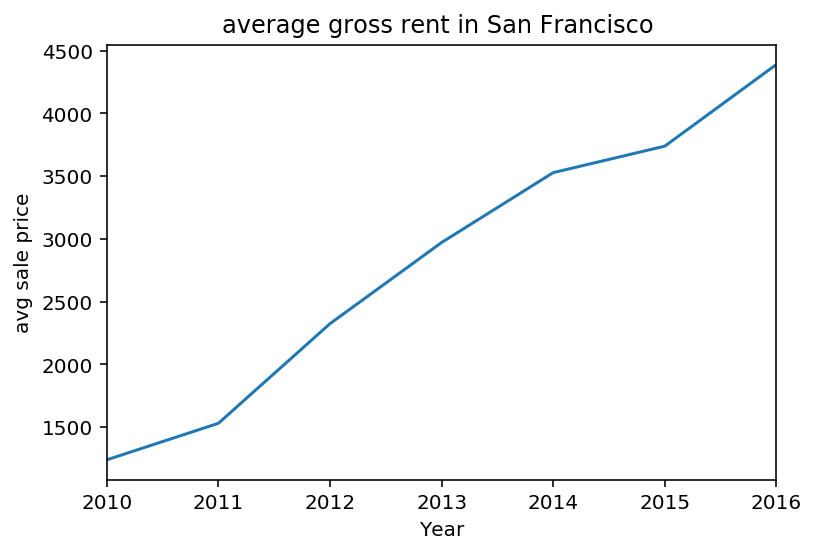
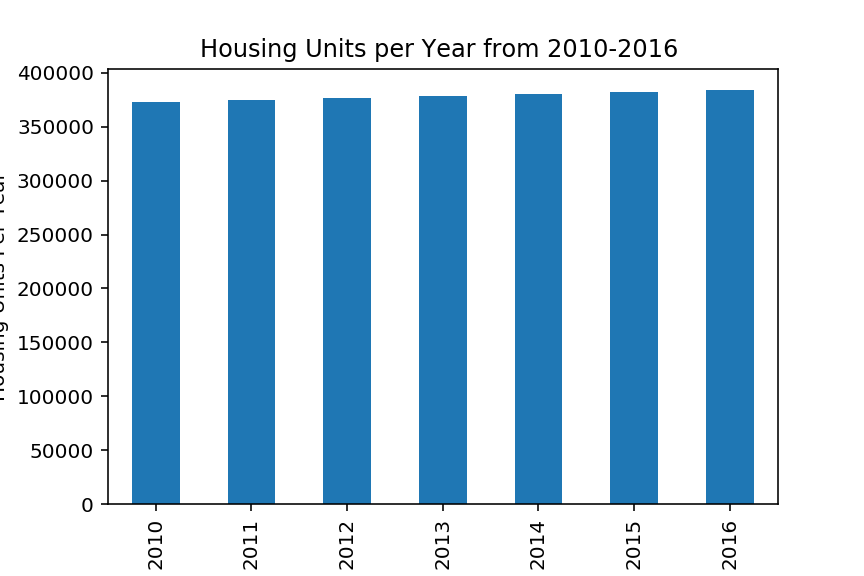
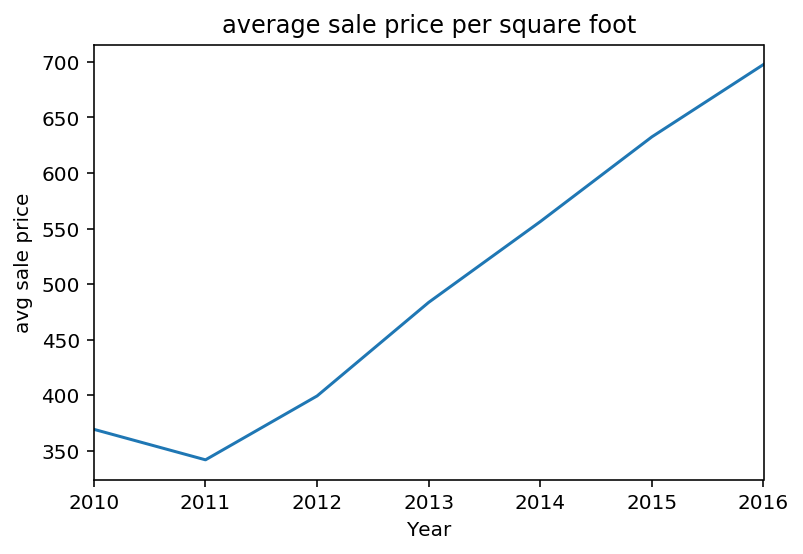
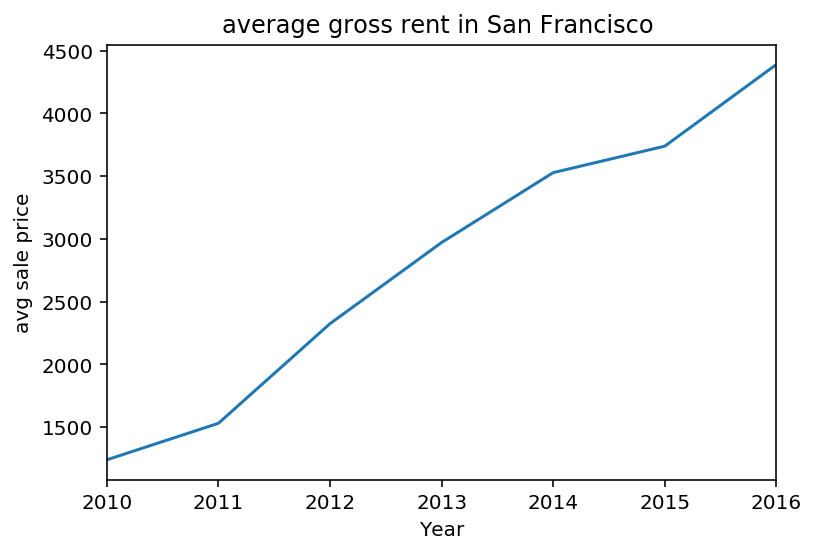
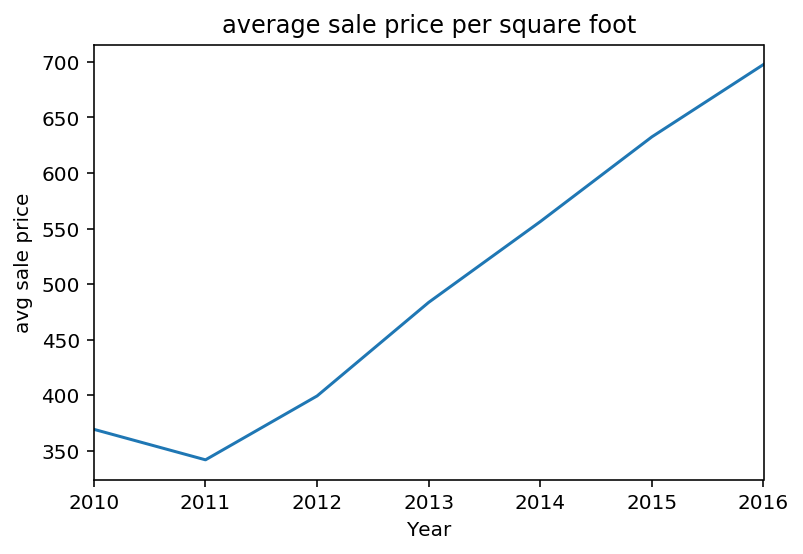

In [151]:
panel.servable() #parallel plots show upin browser, not here.